In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
articles_df = pd.read_csv("/content/articles.csv", encoding='ISO-8859-1')

In [3]:
articles_df

,Id,Heading,Article.Banner.Image,Outlets,Article.Description,Full_Article,Article_Type,Tonality
0,d6995462-5e87-453b-b64d-e9f1df6e94d2,"A Puzzling Maneuver, Then Freefall: NTSB Repor...",NaN,Essex Caller,<p>The helicopter that crashed in Southeast Al...,<p>The helicopter that crashed in Southeast Al...,Commercial,Negative
1,8b05e939-a89e-4548-b92b-013822e8ee7d,Bells Nexus Air Taxi Concept Rings Changes Fo...,NaN,Aviation Week Network,<p>A year after teasing the fledgling electric...,<p>A year after teasing the fledgling electric...,Commercial,Positive
2,69fcd400-bceb-4255-8277-619f2d68ac0b,Bell Helicopter Show Air Taxi Nexus,http://images.tmtpost.com/uploads/images/2019/...,TMTPost,<p>Bell released the full-size design of the v...,<p>Bell released the full-size design of the v...,Commercial,Positive
3,17943578-c11b-414b-b3f5-063d3a93157b,BELL DÉVOILE LA CONCEPTION INTÉGRALE DE SON TA...,http://www.fredzone.org/wp-content/uploads/201...,Fredzone,<p>Bell est une soci&eacute;t&eacute; am&eacut...,<p>Bell est une soci&eacute;t&eacute; am&eacut...,Commercial,Positive
4,f33c7b11-5f77-4a98-bb2e-d36689042aea,Les premiers retours dOlivier Ezratty,NaN,FrenchWeb,<p>It was still anecdotal to observe the explo...,<p>It was still anecdotal to observe the explo...,Commercial,Positive
...,...,...,...,...,...,...,...,...
4300,a40e5017-0a38-4d06-bcbe-616b73456c94,"Chinook Catches Army Flirting With Younger, Th...",https://www.duffelblog.com/wp-content/uploads/...,Duffel Blog,Long rumored tensions came to a head as the CH...,<p>Long rumored tensions came to a head as the...,Military,NaN
4301,782ba519-bcb0-4ef1-873d-713a18b04576,Lufthansa Aviation Selects Reiser Simulation H...,NaN,Vertical,<p>In the course of upcoming investments in ne...,<p>In the course of upcoming investments in ne...,Commercial,Positive
4302,deb31e5d-15c0-4c1d-843c-ce02e9081746,This Bell Flight Drone Wont Be Delivering Pizza,NaN,"WFAA-TV ABC (Dallas, TX)","<p>At Bell Flight in Fort Worth, engineers are...","<p>At Bell Flight in Fort Worth, engineers are...",Military,Positive
4303,f7125b1d-a687-469b-a799-c8cb4443b1d1,Blade Offers New York Airport Transfers for $1...,https://assets.bwbx.io/images/users/iqjWHBFdfx...,Bloomberg,<p>Getting to this price point took about five...,<p>Getting to this price point took about five...,Commercial,Positive


Data Preprocessing and Feature Engineering:

In [4]:
# Unique Values of Article Types

articles_df['Article_Type'].unique()

array(['Commercial', 'Military', 'Training', 'Executives', 'Others',
       'Financing', 'Support & Services'], dtype=object)

In [5]:
# To check the info of the given data

articles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4305 entries, 0 to 4304
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Id                    4305 non-null   object
 1   Heading               4305 non-null   object
 2   Article.Banner.Image  1753 non-null   object
 3   Outlets               4305 non-null   object
 4   Article.Description   4305 non-null   object
 5   Full_Article          4305 non-null   object
 6   Article_Type          4305 non-null   object
 7   Tonality              3873 non-null   object
dtypes: object(8)
memory usage: 269.2+ KB


In [6]:
# To check whether duplicates data is there or not

articles_df.drop_duplicates(keep='first')

,Id,Heading,Article.Banner.Image,Outlets,Article.Description,Full_Article,Article_Type,Tonality
0,d6995462-5e87-453b-b64d-e9f1df6e94d2,"A Puzzling Maneuver, Then Freefall: NTSB Repor...",NaN,Essex Caller,<p>The helicopter that crashed in Southeast Al...,<p>The helicopter that crashed in Southeast Al...,Commercial,Negative
1,8b05e939-a89e-4548-b92b-013822e8ee7d,Bells Nexus Air Taxi Concept Rings Changes Fo...,NaN,Aviation Week Network,<p>A year after teasing the fledgling electric...,<p>A year after teasing the fledgling electric...,Commercial,Positive
2,69fcd400-bceb-4255-8277-619f2d68ac0b,Bell Helicopter Show Air Taxi Nexus,http://images.tmtpost.com/uploads/images/2019/...,TMTPost,<p>Bell released the full-size design of the v...,<p>Bell released the full-size design of the v...,Commercial,Positive
3,17943578-c11b-414b-b3f5-063d3a93157b,BELL DÉVOILE LA CONCEPTION INTÉGRALE DE SON TA...,http://www.fredzone.org/wp-content/uploads/201...,Fredzone,<p>Bell est une soci&eacute;t&eacute; am&eacut...,<p>Bell est une soci&eacute;t&eacute; am&eacut...,Commercial,Positive
4,f33c7b11-5f77-4a98-bb2e-d36689042aea,Les premiers retours dOlivier Ezratty,NaN,FrenchWeb,<p>It was still anecdotal to observe the explo...,<p>It was still anecdotal to observe the explo...,Commercial,Positive
...,...,...,...,...,...,...,...,...
4300,a40e5017-0a38-4d06-bcbe-616b73456c94,"Chinook Catches Army Flirting With Younger, Th...",https://www.duffelblog.com/wp-content/uploads/...,Duffel Blog,Long rumored tensions came to a head as the CH...,<p>Long rumored tensions came to a head as the...,Military,NaN
4301,782ba519-bcb0-4ef1-873d-713a18b04576,Lufthansa Aviation Selects Reiser Simulation H...,NaN,Vertical,<p>In the course of upcoming investments in ne...,<p>In the course of upcoming investments in ne...,Commercial,Positive
4302,deb31e5d-15c0-4c1d-843c-ce02e9081746,This Bell Flight Drone Wont Be Delivering Pizza,NaN,"WFAA-TV ABC (Dallas, TX)","<p>At Bell Flight in Fort Worth, engineers are...","<p>At Bell Flight in Fort Worth, engineers are...",Military,Positive
4303,f7125b1d-a687-469b-a799-c8cb4443b1d1,Blade Offers New York Airport Transfers for $1...,https://assets.bwbx.io/images/users/iqjWHBFdfx...,Bloomberg,<p>Getting to this price point took about five...,<p>Getting to this price point took about five...,Commercial,Positive


In [7]:
articles_df['Heading']

0       A Puzzling Maneuver, Then Freefall: NTSB Repor...
1       Bells Nexus Air Taxi Concept Rings Changes Fo...
2                     Bell Helicopter Show Air Taxi Nexus
3       BELL DÉVOILE LA CONCEPTION INTÉGRALE DE SON TA...
4                  Les premiers retours dOlivier Ezratty
                              ...                        
4300    Chinook Catches Army Flirting With Younger, Th...
4301    Lufthansa Aviation Selects Reiser Simulation H...
4302     This Bell Flight Drone Wont Be Delivering Pizza
4303    Blade Offers New York Airport Transfers for $1...
4304                  US Little Birds Flying to Lebanon
Name: Heading, Length: 4305, dtype: object

In [8]:
# Checking null values
(articles_df.isnull().sum()*100)/articles_df.shape[0]

Id                       0.000000
Heading                  0.000000
Article.Banner.Image    59.279907
Outlets                  0.000000
Article.Description      0.000000
Full_Article             0.000000
Article_Type             0.000000
Tonality                10.034843
dtype: float64

In [9]:
# In Article Banner Image the null values are more than 50% of the total data. So we can drop the column because we cannot treat null values more than 40%-50% of total data.

In [10]:
articles_df.drop('Article.Banner.Image', axis=1, inplace=True)

In [11]:
articles_df

,Id,Heading,Outlets,Article.Description,Full_Article,Article_Type,Tonality
0,d6995462-5e87-453b-b64d-e9f1df6e94d2,"A Puzzling Maneuver, Then Freefall: NTSB Repor...",Essex Caller,<p>The helicopter that crashed in Southeast Al...,<p>The helicopter that crashed in Southeast Al...,Commercial,Negative
1,8b05e939-a89e-4548-b92b-013822e8ee7d,Bells Nexus Air Taxi Concept Rings Changes Fo...,Aviation Week Network,<p>A year after teasing the fledgling electric...,<p>A year after teasing the fledgling electric...,Commercial,Positive
2,69fcd400-bceb-4255-8277-619f2d68ac0b,Bell Helicopter Show Air Taxi Nexus,TMTPost,<p>Bell released the full-size design of the v...,<p>Bell released the full-size design of the v...,Commercial,Positive
3,17943578-c11b-414b-b3f5-063d3a93157b,BELL DÉVOILE LA CONCEPTION INTÉGRALE DE SON TA...,Fredzone,<p>Bell est une soci&eacute;t&eacute; am&eacut...,<p>Bell est une soci&eacute;t&eacute; am&eacut...,Commercial,Positive
4,f33c7b11-5f77-4a98-bb2e-d36689042aea,Les premiers retours dOlivier Ezratty,FrenchWeb,<p>It was still anecdotal to observe the explo...,<p>It was still anecdotal to observe the explo...,Commercial,Positive
...,...,...,...,...,...,...,...
4300,a40e5017-0a38-4d06-bcbe-616b73456c94,"Chinook Catches Army Flirting With Younger, Th...",Duffel Blog,Long rumored tensions came to a head as the CH...,<p>Long rumored tensions came to a head as the...,Military,NaN
4301,782ba519-bcb0-4ef1-873d-713a18b04576,Lufthansa Aviation Selects Reiser Simulation H...,Vertical,<p>In the course of upcoming investments in ne...,<p>In the course of upcoming investments in ne...,Commercial,Positive
4302,deb31e5d-15c0-4c1d-843c-ce02e9081746,This Bell Flight Drone Wont Be Delivering Pizza,"WFAA-TV ABC (Dallas, TX)","<p>At Bell Flight in Fort Worth, engineers are...","<p>At Bell Flight in Fort Worth, engineers are...",Military,Positive
4303,f7125b1d-a687-469b-a799-c8cb4443b1d1,Blade Offers New York Airport Transfers for $1...,Bloomberg,<p>Getting to this price point took about five...,<p>Getting to this price point took about five...,Commercial,Positive


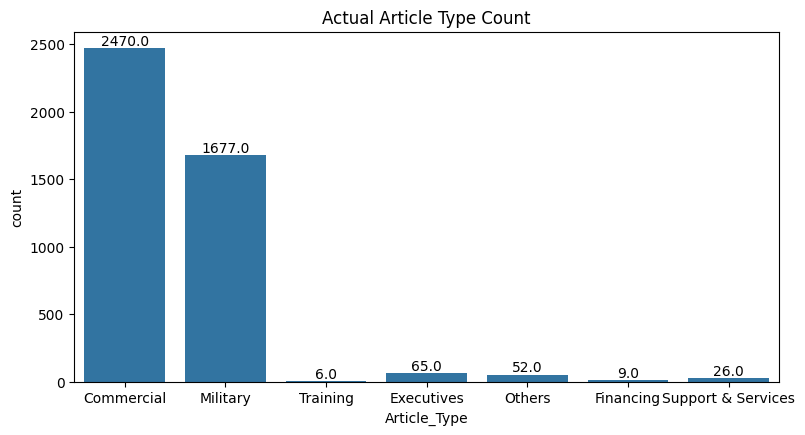

In [12]:
# Plotting Actual Article Type of the data

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
ax = sns.countplot(x=articles_df['Article_Type']);
for bar in ax.patches:
    count = bar.get_height()
    x = bar.get_x() + bar.get_width()/2
    y = bar.get_height()
    ax.annotate(count, (x,y), va = 'bottom', ha = 'center')
plt.title('Actual Article Type Count')
plt.show()

In [13]:
# Cleaning the data

import re

def cleaning(text): #Return clean version of the text
    text = re.sub(r'</?p>', '', text) # Remove <p> and </p> tags
    text = re.sub("[^0-9A-Za-z\-]+", " ", text) # Remove all non-letters and non-spaces except for hyphens and digits
    text = re.sub("-(?!\w)|(?<!\w)-", "", text) # Remove all numbers except those attached to a word
    text = re.sub("(?<!\w)\d+", "", text) #Remove all hyphens except between two words
    text = re.sub(r'\d','',text)
    text = ' '.join(text.split())
    text = text.lower()
    return text

In [14]:
articles_df['Heading'] = articles_df['Heading'].apply(cleaning)

In [15]:
articles_df['Heading']

0       a puzzling maneuver then freefall ntsb report ...
1       bell s nexus air taxi concept rings changes fo...
2                     bell helicopter show air taxi nexus
3       bell d voile la conception int grale de son ta...
4                  les premiers retours d olivier ezratty
                              ...                        
4300    chinook catches army flirting with younger thi...
4301    lufthansa aviation selects reiser simulation h...
4302     this bell flight drone won t be delivering pizza
4303    blade offers new york airport transfers for ai...
4304                    us little birds flying to lebanon
Name: Heading, Length: 4305, dtype: object

In [16]:
articles_df['Full_Article'][0]

'<p>The helicopter that crashed in Southeast Alaska in late September, killing three people, entered a 500-foot freefall before dropping to a Glacier Bay National Park beach, according to by the National Transportation Safety Board.&nbsp;The preliminary NTSB report released Friday offers no official probable cause. That determination won&lsquo;t be made until next year at the earliest.</p>'

In [17]:
articles_df['Full_Article'] = articles_df['Full_Article'].apply(cleaning)

In [18]:
articles_df['Full_Article'][0]

'the helicopter that crashed in southeast alaska in late september killing three people entered a -foot freefall before dropping to a glacier bay national park beach according to by the national transportation safety board nbsp the preliminary ntsb report released friday offers no official probable cause that determination won lsquo t be made until next year at the earliest'

In [19]:
!pip install sentence_transformers

In [20]:
from sentence_transformers import SentenceTransformer

# Load the pre-trained Sentence-BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Vectorize the 'Full_Article' text
article_vectors = model.encode(articles_df['Full_Article'].tolist())

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [21]:
# Display the shape of the resulting vectors
article_vectors.shape

(4305, 384)

In [22]:
from sklearn.model_selection import train_test_split
import lightgbm as lg
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

lbl_encoder = LabelEncoder()

articles_df['Article_Type'] = lbl_encoder.fit_transform(articles_df['Article_Type'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(article_vectors, articles_df['Article_Type'], test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [23]:
model = lg.LGBMClassifier(seed=42)

In [24]:
parameters = {
'max_depth' : np.arange(4,12),
'n_estimators' : [10,25,50,100]
}

In [25]:
grid = GridSearchCV(estimator=model, param_grid=parameters, cv=5, scoring='roc_auc')

In [ ]:
grid.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011853 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 97920
[LightGBM] [Info] Number of data points in the train set: 2755, number of used features: 384
[LightGBM] [Info] Start training from score -0.566171
[LightGBM] [Info] Start training from score -4.136983
[LightGBM] [Info] Start training from score -6.534878
[LightGBM] [Info] Start training from score -0.929076
[LightGBM] [Info] Start training from score -4.337654
[LightGBM] [Info] Start training from score -5.282115
[LightGBM] [Info] Start training from score -6.311735
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 452, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012500 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 97920
[LightGBM] [Info] Number of data points in the train set: 2755, number of used features: 384
[LightGBM] [Info] Start training from score -0.566171
[LightGBM] [Info] Start training from score -4.136983
[LightGBM] [Info] Start training from score -6.311735
[LightGBM] [Info] Start training from score -0.929076
[LightGBM] [Info] Start training from score -4.365825
[LightGBM] [Info] Start training from score -5.282115
[LightGBM] [Info] Start training from score -6.311735
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 452, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013266 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 97920
[LightGBM] [Info] Number of data points in the train set: 2755, number of used features: 384
[LightGBM] [Info] Start training from score -0.566171
[LightGBM] [Info] Start training from score -4.136983
[LightGBM] [Info] Start training from score -6.311735
[LightGBM] [Info] Start training from score -0.929076
[LightGBM] [Info] Start training from score -4.365825
[LightGBM] [Info] Start training from score -5.282115
[LightGBM] [Info] Start training from score -6.311735
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 452, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024662 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 97920
[LightGBM] [Info] Number of data points in the train set: 2755, number of used features: 384
[LightGBM] [Info] Start training from score -0.566171
[LightGBM] [Info] Start training from score -4.136983
[LightGBM] [Info] Start training from score -6.311735
[LightGBM] [Info] Start training from score -0.929076
[LightGBM] [Info] Start training from score -4.365825
[LightGBM] [Info] Start training from score -5.213123
[LightGBM] [Info] Start training from score -6.534878
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 452, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023497 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 97920
[LightGBM] [Info] Number of data points in the train set: 2756, number of used features: 384
[LightGBM] [Info] Start training from score -0.566534
[LightGBM] [Info] Start training from score -4.137346
[LightGBM] [Info] Start training from score -6.312098
[LightGBM] [Info] Start training from score -0.929439
[LightGBM] [Info] Start training from score -4.366188
[LightGBM] [Info] Start training from score -5.213485
[LightGBM] [Info] Start training from score -6.312098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 452, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013121 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 97920
[LightGBM] [Info] Number of data points in the train set: 2755, number of used features: 384
[LightGBM] [Info] Start training from score -0.566171
[LightGBM] [Info] Start training from score -4.136983
[LightGBM] [Info] Start training from score -6.534878
[LightGBM] [Info] Start training from score -0.929076
[LightGBM] [Info] Start training from score -4.337654
[LightGBM] [Info] Start training from score -5.282115
[LightGBM] [Info] Start training from score -6.311735
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 452, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013432 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 97920
[LightGBM] [Info] Number of data points in the train set: 2755, number of used features: 384
[LightGBM] [Info] Start training from score -0.566171
[LightGBM] [Info] Start training from score -4.136983
[LightGBM] [Info] Start training from score -6.311735
[LightGBM] [Info] Start training from score -0.929076
[LightGBM] [Info] Start training from score -4.365825
[LightGBM] [Info] Start training from score -5.282115
[LightGBM] [Info] Start training from score -6.311735
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 452, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012516 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 97920
[LightGBM] [Info] Number of data points in the train set: 2755, number of used features: 384
[LightGBM] [Info] Start training from score -0.566171
[LightGBM] [Info] Start training from score -4.136983
[LightGBM] [Info] Start training from score -6.311735
[LightGBM] [Info] Start training from score -0.929076
[LightGBM] [Info] Start training from score -4.365825
[LightGBM] [Info] Start training from score -5.282115
[LightGBM] [Info] Start training from score -6.311735
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 452, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012600 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 97920
[LightGBM] [Info] Number of data points in the train set: 2755, number of used features: 384
[LightGBM] [Info] Start training from score -0.566171
[LightGBM] [Info] Start training from score -4.136983
[LightGBM] [Info] Start training from score -6.311735
[LightGBM] [Info] Start training from score -0.929076
[LightGBM] [Info] Start training from score -4.365825
[LightGBM] [Info] Start training from score -5.213123
[LightGBM] [Info] Start training from score -6.534878
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 452, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022691 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 97920
[LightGBM] [Info] Number of data points in the train set: 2756, number of used features: 384
[LightGBM] [Info] Start training from score -0.566534
[LightGBM] [Info] Start training from score -4.137346
[LightGBM] [Info] Start training from score -6.312098
[LightGBM] [Info] Start training from score -0.929439
[LightGBM] [Info] Start training from score -4.366188
[LightGBM] [Info] Start training from score -5.213485
[LightGBM] [Info] Start training from score -6.312098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 452, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014549 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 97920
[LightGBM] [Info] Number of data points in the train set: 2755, number of used features: 384
[LightGBM] [Info] Start training from score -0.566171
[LightGBM] [Info] Start training from score -4.136983
[LightGBM] [Info] Start training from score -6.534878
[LightGBM] [Info] Start training from score -0.929076
[LightGBM] [Info] Start training from score -4.337654
[LightGBM] [Info] Start training from score -5.282115
[LightGBM] [Info] Start training from score -6.311735
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 452, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012562 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 97920
[LightGBM] [Info] Number of data points in the train set: 2755, number of used features: 384
[LightGBM] [Info] Start training from score -0.566171
[LightGBM] [Info] Start training from score -4.136983
[LightGBM] [Info] Start training from score -6.311735
[LightGBM] [Info] Start training from score -0.929076
[LightGBM] [Info] Start training from score -4.365825
[LightGBM] [Info] Start training from score -5.282115
[LightGBM] [Info] Start training from score -6.311735
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 452, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021381 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 97920
[LightGBM] [Info] Number of data points in the train set: 2755, number of used features: 384
[LightGBM] [Info] Start training from score -0.566171
[LightGBM] [Info] Start training from score -4.136983
[LightGBM] [Info] Start training from score -6.311735
[LightGBM] [Info] Start training from score -0.929076
[LightGBM] [Info] Start training from score -4.365825
[LightGBM] [Info] Start training from score -5.282115
[LightGBM] [Info] Start training from score -6.311735
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 452, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012409 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 97920
[LightGBM] [Info] Number of data points in the train set: 2755, number of used features: 384
[LightGBM] [Info] Start training from score -0.566171
[LightGBM] [Info] Start training from score -4.136983
[LightGBM] [Info] Start training from score -6.311735
[LightGBM] [Info] Start training from score -0.929076
[LightGBM] [Info] Start training from score -4.365825
[LightGBM] [Info] Start training from score -5.213123
[LightGBM] [Info] Start training from score -6.534878
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 452, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013257 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 97920
[LightGBM] [Info] Number of data points in the train set: 2756, number of used features: 384
[LightGBM] [Info] Start training from score -0.566534
[LightGBM] [Info] Start training from score -4.137346
[LightGBM] [Info] Start training from score -6.312098
[LightGBM] [Info] Start training from score -0.929439
[LightGBM] [Info] Start training from score -4.366188
[LightGBM] [Info] Start training from score -5.213485
[LightGBM] [Info] Start training from score -6.312098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 452, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012309 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 97920
[LightGBM] [Info] Number of data points in the train set: 2755, number of used features: 384
[LightGBM] [Info] Start training from score -0.566171
[LightGBM] [Info] Start training from score -4.136983
[LightGBM] [Info] Start training from score -6.534878
[LightGBM] [Info] Start training from score -0.929076
[LightGBM] [Info] Start training from score -4.337654
[LightGBM] [Info] Start training from score -5.282115
[LightGBM] [Info] Start training from score -6.311735
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 452, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012654 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 97920
[LightGBM] [Info] Number of data points in the train set: 2755, number of used features: 384
[LightGBM] [Info] Start training from score -0.566171
[LightGBM] [Info] Start training from score -4.136983
[LightGBM] [Info] Start training from score -6.311735
[LightGBM] [Info] Start training from score -0.929076
[LightGBM] [Info] Start training from score -4.365825
[LightGBM] [Info] Start training from score -5.282115
[LightGBM] [Info] Start training from score -6.311735
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 452, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012647 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 97920
[LightGBM] [Info] Number of data points in the train set: 2755, number of used features: 384
[LightGBM] [Info] Start training from score -0.566171
[LightGBM] [Info] Start training from score -4.136983
[LightGBM] [Info] Start training from score -6.311735
[LightGBM] [Info] Start training from score -0.929076
[LightGBM] [Info] Start training from score -4.365825
[LightGBM] [Info] Start training from score -5.282115
[LightGBM] [Info] Start training from score -6.311735
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 452, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013108 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 97920
[LightGBM] [Info] Number of data points in the train set: 2755, number of used features: 384
[LightGBM] [Info] Start training from score -0.566171
[LightGBM] [Info] Start training from score -4.136983
[LightGBM] [Info] Start training from score -6.311735
[LightGBM] [Info] Start training from score -0.929076
[LightGBM] [Info] Start training from score -4.365825
[LightGBM] [Info] Start training from score -5.213123
[LightGBM] [Info] Start training from score -6.534878
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 452, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022539 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 97920
[LightGBM] [Info] Number of data points in the train set: 2756, number of used features: 384
[LightGBM] [Info] Start training from score -0.566534
[LightGBM] [Info] Start training from score -4.137346
[LightGBM] [Info] Start training from score -6.312098
[LightGBM] [Info] Start training from score -0.929439
[LightGBM] [Info] Start training from score -4.366188
[LightGBM] [Info] Start training from score -5.213485
[LightGBM] [Info] Start training from score -6.312098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 452, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012711 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 97920
[LightGBM] [Info] Number of data points in the train set: 2755, number of used features: 384
[LightGBM] [Info] Start training from score -0.566171
[LightGBM] [Info] Start training from score -4.136983
[LightGBM] [Info] Start training from score -6.534878
[LightGBM] [Info] Start training from score -0.929076
[LightGBM] [Info] Start training from score -4.337654
[LightGBM] [Info] Start training from score -5.282115
[LightGBM] [Info] Start training from score -6.311735
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 452, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023188 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 97920
[LightGBM] [Info] Number of data points in the train set: 2755, number of used features: 384
[LightGBM] [Info] Start training from score -0.566171
[LightGBM] [Info] Start training from score -4.136983
[LightGBM] [Info] Start training from score -6.311735
[LightGBM] [Info] Start training from score -0.929076
[LightGBM] [Info] Start training from score -4.365825
[LightGBM] [Info] Start training from score -5.282115
[LightGBM] [Info] Start training from score -6.311735
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 452, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012700 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 97920
[LightGBM] [Info] Number of data points in the train set: 2755, number of used features: 384
[LightGBM] [Info] Start training from score -0.566171
[LightGBM] [Info] Start training from score -4.136983
[LightGBM] [Info] Start training from score -6.311735
[LightGBM] [Info] Start training from score -0.929076
[LightGBM] [Info] Start training from score -4.365825
[LightGBM] [Info] Start training from score -5.282115
[LightGBM] [Info] Start training from score -6.311735
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 452, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012781 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 97920
[LightGBM] [Info] Number of data points in the train set: 2755, number of used features: 384
[LightGBM] [Info] Start training from score -0.566171
[LightGBM] [Info] Start training from score -4.136983
[LightGBM] [Info] Start training from score -6.311735
[LightGBM] [Info] Start training from score -0.929076
[LightGBM] [Info] Start training from score -4.365825
[LightGBM] [Info] Start training from score -5.213123
[LightGBM] [Info] Start training from score -6.534878
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 452, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012661 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 97920
[LightGBM] [Info] Number of data points in the train set: 2756, number of used features: 384
[LightGBM] [Info] Start training from score -0.566534
[LightGBM] [Info] Start training from score -4.137346
[LightGBM] [Info] Start training from score -6.312098
[LightGBM] [Info] Start training from score -0.929439
[LightGBM] [Info] Start training from score -4.366188
[LightGBM] [Info] Start training from score -5.213485
[LightGBM] [Info] Start training from score -6.312098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 452, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012691 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 97920
[LightGBM] [Info] Number of data points in the train set: 2755, number of used features: 384
[LightGBM] [Info] Start training from score -0.566171
[LightGBM] [Info] Start training from score -4.136983
[LightGBM] [Info] Start training from score -6.534878
[LightGBM] [Info] Start training from score -0.929076
[LightGBM] [Info] Start training from score -4.337654
[LightGBM] [Info] Start training from score -5.282115
[LightGBM] [Info] Start training from score -6.311735
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 452, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012658 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 97920
[LightGBM] [Info] Number of data points in the train set: 2755, number of used features: 384
[LightGBM] [Info] Start training from score -0.566171
[LightGBM] [Info] Start training from score -4.136983
[LightGBM] [Info] Start training from score -6.311735
[LightGBM] [Info] Start training from score -0.929076
[LightGBM] [Info] Start training from score -4.365825
[LightGBM] [Info] Start training from score -5.282115
[LightGBM] [Info] Start training from score -6.311735
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 452, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022724 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 97920
[LightGBM] [Info] Number of data points in the train set: 2755, number of used features: 384
[LightGBM] [Info] Start training from score -0.566171
[LightGBM] [Info] Start training from score -4.136983
[LightGBM] [Info] Start training from score -6.311735
[LightGBM] [Info] Start training from score -0.929076
[LightGBM] [Info] Start training from score -4.365825
[LightGBM] [Info] Start training from score -5.282115
[LightGBM] [Info] Start training from score -6.311735
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 452, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012555 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 97920
[LightGBM] [Info] Number of data points in the train set: 2755, number of used features: 384
[LightGBM] [Info] Start training from score -0.566171
[LightGBM] [Info] Start training from score -4.136983
[LightGBM] [Info] Start training from score -6.311735
[LightGBM] [Info] Start training from score -0.929076
[LightGBM] [Info] Start training from score -4.365825
[LightGBM] [Info] Start training from score -5.213123
[LightGBM] [Info] Start training from score -6.534878
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 452, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012648 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 97920
[LightGBM] [Info] Number of data points in the train set: 2756, number of used features: 384
[LightGBM] [Info] Start training from score -0.566534
[LightGBM] [Info] Start training from score -4.137346
[LightGBM] [Info] Start training from score -6.312098
[LightGBM] [Info] Start training from score -0.929439
[LightGBM] [Info] Start training from score -4.366188
[LightGBM] [Info] Start training from score -5.213485
[LightGBM] [Info] Start training from score -6.312098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 452, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022582 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 97920
[LightGBM] [Info] Number of data points in the train set: 2755, number of used features: 384
[LightGBM] [Info] Start training from score -0.566171
[LightGBM] [Info] Start training from score -4.136983
[LightGBM] [Info] Start training from score -6.534878
[LightGBM] [Info] Start training from score -0.929076
[LightGBM] [Info] Start training from score -4.337654
[LightGBM] [Info] Start training from score -5.282115
[LightGBM] [Info] Start training from score -6.311735
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 452, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014929 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 97920
[LightGBM] [Info] Number of data points in the train set: 2755, number of used features: 384
[LightGBM] [Info] Start training from score -0.566171
[LightGBM] [Info] Start training from score -4.136983
[LightGBM] [Info] Start training from score -6.311735
[LightGBM] [Info] Start training from score -0.929076
[LightGBM] [Info] Start training from score -4.365825
[LightGBM] [Info] Start training from score -5.282115
[LightGBM] [Info] Start training from score -6.311735
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 452, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022321 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 97920
[LightGBM] [Info] Number of data points in the train set: 2755, number of used features: 384
[LightGBM] [Info] Start training from score -0.566171
[LightGBM] [Info] Start training from score -4.136983
[LightGBM] [Info] Start training from score -6.311735
[LightGBM] [Info] Start training from score -0.929076
[LightGBM] [Info] Start training from score -4.365825
[LightGBM] [Info] Start training from score -5.282115
[LightGBM] [Info] Start training from score -6.311735
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 452, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012737 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 97920
[LightGBM] [Info] Number of data points in the train set: 2755, number of used features: 384
[LightGBM] [Info] Start training from score -0.566171
[LightGBM] [Info] Start training from score -4.136983
[LightGBM] [Info] Start training from score -6.311735
[LightGBM] [Info] Start training from score -0.929076
[LightGBM] [Info] Start training from score -4.365825
[LightGBM] [Info] Start training from score -5.213123
[LightGBM] [Info] Start training from score -6.534878
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 452, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012340 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 97920
[LightGBM] [Info] Number of data points in the train set: 2756, number of used features: 384
[LightGBM] [Info] Start training from score -0.566534
[LightGBM] [Info] Start training from score -4.137346
[LightGBM] [Info] Start training from score -6.312098
[LightGBM] [Info] Start training from score -0.929439
[LightGBM] [Info] Start training from score -4.366188
[LightGBM] [Info] Start training from score -5.213485
[LightGBM] [Info] Start training from score -6.312098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 452, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012846 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 97920
[LightGBM] [Info] Number of data points in the train set: 2755, number of used features: 384
[LightGBM] [Info] Start training from score -0.566171
[LightGBM] [Info] Start training from score -4.136983
[LightGBM] [Info] Start training from score -6.534878
[LightGBM] [Info] Start training from score -0.929076
[LightGBM] [Info] Start training from score -4.337654
[LightGBM] [Info] Start training from score -5.282115
[LightGBM] [Info] Start training from score -6.311735
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 452, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012944 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 97920
[LightGBM] [Info] Number of data points in the train set: 2755, number of used features: 384
[LightGBM] [Info] Start training from score -0.566171
[LightGBM] [Info] Start training from score -4.136983
[LightGBM] [Info] Start training from score -6.311735
[LightGBM] [Info] Start training from score -0.929076
[LightGBM] [Info] Start training from score -4.365825
[LightGBM] [Info] Start training from score -5.282115
[LightGBM] [Info] Start training from score -6.311735
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 452, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020811 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 97920
[LightGBM] [Info] Number of data points in the train set: 2755, number of used features: 384
[LightGBM] [Info] Start training from score -0.566171
[LightGBM] [Info] Start training from score -4.136983
[LightGBM] [Info] Start training from score -6.311735
[LightGBM] [Info] Start training from score -0.929076
[LightGBM] [Info] Start training from score -4.365825
[LightGBM] [Info] Start training from score -5.282115
[LightGBM] [Info] Start training from score -6.311735
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

In [ ]:
grid.best_params_

In [ ]:
grid.best_score_

In [ ]:
best_model = lg.LGBMClassifier(max_depth=, n_estimators=50)

In [ ]:
best_model.fit(X_train, y_train)

In [ ]:
best_model.score(x_train, y_train)  # Performance of the training model

In [ ]:
y_pred = best_model.predict(x_test) # Prediction of the model

In [ ]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

plot_confusion_matrix(best_model, X_test, y_test)
plt.title('Confusion Matrix of X_test and y_test')
plt.show()

In [ ]:
plot_confusion_matrix(best_model, X_test, y_test)
plt.title('Confusion Matrix of X_test and y_test')
plt.show()

In [ ]:
plot_roc_curve(best_model, X_test, y_test)
plt.title('AUC ROC CURVE')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import precision_score, accuracy_score

print('Accuracy score', accuracy_score(y_test, y_pred))
print('Precision Score', precision_score(y_test, y_pred))

In [ ]:
# Feature Importances:

lg.plot_importance(best_model)
plt.title('Feature Importances')
plt.show()

In [ ]:
import joblib

# Save the model
joblib.dump(best_model, 'text_classifier.pkl')

# Load the model
clf = joblib.load('text_classifier.pkl')

In [ ]:
!pip install fastapi[all] pyngrok

In [ ]:
!ngrok config add-authtoken 2ZZUSpg2Xa44jDsdjgiAnnqyUA3_56bN1VH45Sf4Y1nC4Dguw

In [ ]:
from fastapi import FastAPI
from fastapi.requests import Request
from fastapi.responses import JSONResponse
import uvicorn
import nest_asyncio
from pyngrok import ngrok


app = FastAPI()

clf = joblib.load('text_classifier.pkl')
model = SentenceTransformer('all-MiniLM-L6-v2')

@app.get('/Grammar')
def Grammar(text: str):
    text = data['text']
    vector = model.encode([text])[0]
    prediction = clf.predict([vector])[0]
    return {'Article_Type': prediction}

ngrok_tunnel = ngrok.connect(8000)
print('Public URL:', ngrok_tunnel.public_url)
nest_asyncio.apply()
uvicorn.run(app, port=8000)